# HOSPITAL RATING CLASSIFICATION

Welcome to the Starter Code for the Hospital Rating Classification Capstone Project!

In this notebook you'll find 
- A blueprint on how to attempt the course project.
- Additional hints and directions on different tasks

Please note that this approach is one of the many approaches you can take for solving this Capstone project.

### Import the necessary libraries

In [1]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Task 1 

Task 1: Understand the data

 

Take some time to familiarize yourself with the data. What are the key variables?

Specifically, answer the following questions:

- 1.1 - Perform a few basic data quality checks to understand the different columns and prepare descriptive statistics for some of the important columns.
- 1.2 - What is the distribution of hospital overall ratings? How are they varying across other parameters like `State`? Create  a few visualizations that provide some insights into the data.

##### Task 1.1

In [3]:
df = pd.read_csv('hospital-info.csv')
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Voluntary,Yes,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


In [4]:
##Check the data type of the different columns
## Hint - You can use the .info() method here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

Note down your observations after completing the above task. You should ask questions such as:

- Check for non-null columns. Do you see any column having missing values?
- Are the datatypes correct for all the variables? You might have to convert a few of them to categorical later

##### Task 1.2

In [5]:
## Descriptive Statistics
## Let's take the main measures and the hospital overall rating first.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison', 'Hospital overall rating']

In [6]:
### Filter out the above columns from the DataFrame and compute the descriptive statistics
### Hint - The .describe() method might be useful

df[features].describe()

,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Hospital overall rating
count,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,1.018973,1.042852,0.981681,0.937848,1.192673,0.976447,1.006215,3.025842
std,0.492383,0.693884,0.731887,0.799253,0.647062,0.750720,0.478217,0.869600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,4.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000


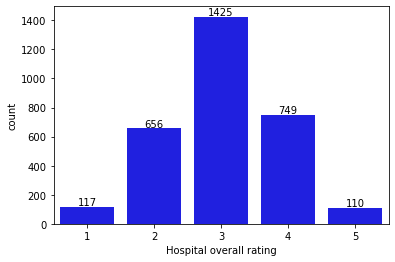

In [7]:
### Analyze your target variable - "Hospital overall rating"
### How does the ratings distribution look like for all the hospitals?

## Hint - You can use seaborn plots like countplot() for checking distribution of the ratings

sns.countplot(data = df, x = "Hospital overall rating", color = 'blue')
counts = df['Hospital overall rating'].value_counts().sort_index()
for i, count in enumerate(counts):
    plt.annotate(str(count), xy=(i, count+10), ha='center')

<AxesSubplot:>

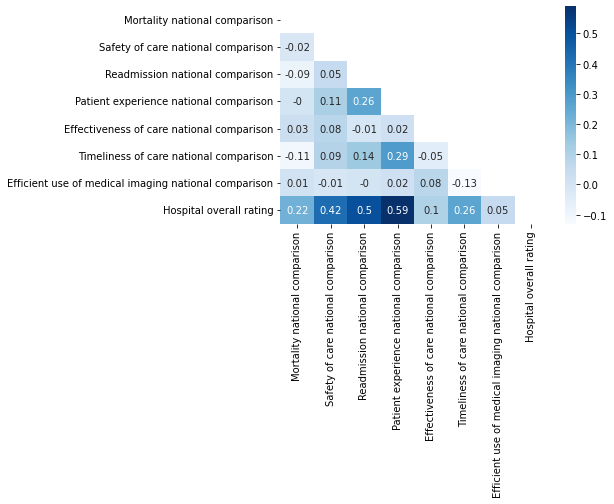

In [8]:
## Heat map
## Hint - You can plot a correlation heatmap to check the correlation between the main measures stored in "features"
## Hint - You can also check the correlations between the "Hospital overall rating" and other measures
corr = round(df[features].corr(), 2)

sns.heatmap(corr, mask = np.triu(np.ones_like(corr)), cmap="Blues", annot=True)

In [9]:
### Check how the hospital ratings vary across other parameters
### Hint - Some example parameters are "State" and "Hospital Ownership"
### Hint - You can use the pivot_table functionality of pandas to perform this

pivot_table = pd.pivot_table(df, values='Hospital overall rating', index='State', columns='Hospital Ownership', aggfunc='mean')
round(pivot_table.sort_values(by = 'Others', ascending = False), 2)

Hospital Ownership,Government,Others,Voluntary
State,,,
SD,4.00,5.00,3.90
HI,3.25,4.50,3.00
NE,2.00,4.20,3.29
MT,NaN,4.00,3.50
ID,3.00,4.00,3.60
OH,3.00,4.00,3.37
KS,3.58,3.90,3.32
CO,2.80,3.80,3.56
WI,3.50,3.75,3.69



Note down your observations after completing the above task. You should ask questions such as:

- How are ratings distributed? the Are you seeing any peculiar distributions for the ratings?
        - The ratings are normally distributed.
- How do the correlations between the measures and the target variable look like?
        - Patient's experience is highly correlated with hospital's overall rating.
- How do ratings vary across the different levels of the parameter that you have taken?
        - PA, SD, and UT have highest rated Government hospitals.

### Task 2 - Building machine learning models

Use your knowledge of classification models to create three models that predict hospital ratings. You should follow these steps:

- Prepare the data for the machine learning model 
   - Remove all the demographic columns as well as any other uneccessary features from the data set
   - For simplification, instead of having 5 ratings, we will convert them to 0 and 1. Here 0 indicates that the hospital has been rated 3 or below and 1 indicates that the hospital has been rated as 4 or 5.  Encode the Hospital columns as follows
            1,2,3 : 0
            4,5: 1
   - Store the predictors and the target variable in variables X and y.
   - Create the dummy variables for categorical columns.
   - Split the data into train and test sets (70-30 split with random state 0. This random state is recommended, though you can use any other random state of your choice).
   - Scale the numerical columns using StandardScaler.
- Build 3 classification models on your dataset. Carefully apply regularization and hyperparameter tuning techniques to improve your model performance for each of the models.
- Summarize the classification performance in terms of the necessary metrics such as accuracy, sensitivity, specificity, etc.

#####  Prepare the data for machine learning model

In [10]:
## Drop all the demographic features
demo_features = ['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number']

In [11]:
## Drop all the above features from the DataFrame df and store the rest of the features in df2
df2 = df.drop(demo_features, axis = 1)

In [12]:
### Check the first 5 rows of df2 to see if the drop operation has worked correctly or not
df2.head()

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,Government,Yes,3,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,Government,Yes,2,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,Voluntary,Yes,3,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,Others,Yes,3,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


In [13]:
##Recheck the columns to see if anything else needs to be dropped
## There might be other unnecessary columns that require dropping
df2.columns

Index(['Hospital Ownership', 'Emergency Services', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison',
       'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score',
       'rating_group', 'READM_30_AMI_Score', 'READM_30_CABG_Score',
       'READM_30_COPD_Score', 'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score',
       'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score',
       'TIME_OP_21_Score', 'TIME_OP_5_Score', 'EFF_EDV_Score',
       'EFF_ED_1b_Score', 'EFF_ED_2b_Score', 'EFF_IMM_2_Score',
       'EFF_IMM_3_OP_27_FAC_ADHPCT_Score', 'EFF_OP_18b_Score',
       'EFF_OP_20_Score', 'EFF_OP_2

##### Map the ratings 

- 1,2,3 will be 0
- 4,5 will be 1

In [14]:
## Hint -  Write a simple lambda function to do the mapping
## Refer to this link from Course 1 for more help -  https://learn.upgrad.com/course/2897/segment/16179/128948/394776/2054363
df2['Hospital overall rating'] = df2['Hospital overall rating'].apply(lambda x: 0 if x < 4 else 1)
df2['Emergency Services'] = df2['Emergency Services'].apply(lambda x: 0 if x == 'Yes' else 1)
df2['Hospital Ownership'] = df2['Hospital Ownership'].apply(lambda x: {'Government': 0, 'Voluntary': 1, 'Others': 2}[x])

##### Convert the datatypes of the categorical variables

In [15]:
### In task 1, you would have identified the categorical variables, which may or may not be in their correct data types
### Now is the right time to convert them to the correct datatype 
### This will be useful when you create dummy variables next
cat_vars = ['Hospital Ownership', 'Emergency Services', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison']
for column in cat_vars:
    df2[column] = pd.Categorical(df2[column])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Hospital Ownership                                    3057 non-null   category
 1   Emergency Services                                    3057 non-null   category
 2   Hospital overall rating                               3057 non-null   category
 3   Mortality national comparison                         3057 non-null   category
 4   Safety of care national comparison                    3057 non-null   category
 5   Readmission national comparison                       3057 non-null   category
 6   Patient experience national comparison                3057 non-null   category
 7   Effectiveness of care national comparison             3057 non-null   category
 8   Timeliness of care national comparison          

##### Data Preparation and Train-test split

In [16]:
### Create X and y variable
X = df2.drop('Hospital overall rating', axis = 1)
y = df2['Hospital overall rating']

In [17]:
### Create the dummy variables for categorical variables
### Note - Make sure the "drop_first parameter" is correctly initialized for different ML models
### Hint - You can create multiple versions of the X dataset
X = pd.get_dummies(X, drop_first=False) #for kNN and trees
X2 = pd.get_dummies(X, drop_first=True) #for regression

In [18]:
## Perform the train_test split to create the train and validation sets
## Choose any random state of your choice 
## Split it in the ratio of 70-30
X_train, X_val, X2_train, X2_val, y_train, y_val = train_test_split(X, X2, y, test_size=0.3, random_state = 1)

In [19]:
# Scale and Standardize the numerical variables
numeric_cols = [col for col in X.columns if X[col].dtypes != 'category']

scaler = StandardScaler()
X_train[numeric_cols]= scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols]= scaler.transform(X_val[numeric_cols])
X2_train[numeric_cols]= scaler.fit_transform(X2_train[numeric_cols])
X2_val[numeric_cols]= scaler.transform(X2_val[numeric_cols])

In [20]:
X2_train.columns

Index(['MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score',
       'rating_group', 'READM_30_AMI_Score', 'READM_30_CABG_Score',
       'READM_30_COPD_Score',
       ...
       'Patient experience national comparison_2',
       'Effectiveness of care national comparison_0',
       'Effectiveness of care national comparison_1',
       'Effectiveness of care national comparison_2',
       'Timeliness of care national comparison_0',
       'Timeliness of care national comparison_1',
       'Timeliness of care national comparison_2',
       'Efficient use of medical imaging national comparison_0',
       'Efficient use of medical imaging national comparison_1',
       'Efficient use of medical imaging national comparison_2'],
      dtype='object', length=102)

#####  Model building and evaluation

You have learned multiple classification models till now, such as logistic regression, k-NN and decision trees. You should choose 3 of the models for performing the tasks in this section. You can follow the below steps:


- Build the models and fit it on training data
- Perform classifications on the validation data
- Compute and tabulate the validation accuracies for the different models
- Compare the accuracies for the different models and choose the best model

**Note** - You can also evaluate your models using additional metrics like `F1 score`, `Sensitivity`,`Specificity` , etc.


**Helpful Resource** - For writing precise code for this section, you can refer to the code you learned in Model Selection Lab Session in the `kNN and Model Selection` module.




- Additional notes
  - You can peform additional tasks like building ROC/AUC curves for all the models and identifying an optimal cut-off
  - You can also build conjectures around some arbitrary metric cut-offs. For example, say you want to build a model which has atleast 50% accuracy, specificity and sensitivity. Use these conjectures to arrive at a final model
  - Note that there is no right answer for this particular question. You will be awarded marks as long as your overall approach is correct

In [21]:
# Defining RMSE
def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

In [22]:
# Linear model (using LassoCV)
lasso_model = LassoCV(alphas = np.arange(0.01, 25, 0.25), cv = 5, max_iter = 50000)
lasso_model.fit(X2_train, y_train)

# training best model
lr_best = Lasso(alpha = lasso_model.alpha_)
lr_best.fit(X2_train, y_train)

# calculation RMSE
lr_train_rmse = rmse(y_train, lr_best.predict(X2_train))
lr_val_rmse = rmse(y_val, lr_best.predict(X2_val))

In [23]:
# Logistic Model
log_clf_best = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, 
                                     max_iter=200)
log_clf_best.fit(X2_train, y_train)

# Calculating rmse value
log_train_rmse = rmse(y_train, log_clf_best.predict(X2_train))
log_val_rmse = rmse(y_val, log_clf_best.predict(X2_val))

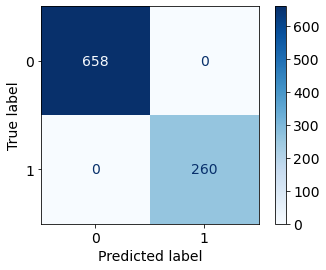

In [24]:
# plotting confusing matrix
plt.rcParams.update({'font.size': 14}) # To make the plot labels easier to read

# Plot the confusion matrix for the logistic regression model
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_clf_best, X_val, y_val, cmap = plt.cm.Blues);

In [25]:
# Tree Model
tree_reg = DecisionTreeRegressor()
path= tree_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

#fit the trees
regs=[]

for ccp_alpha in ccp_alphas:
    #train
    curr_reg = DecisionTreeRegressor(random_state=0, ccp_alpha = ccp_alpha)
    curr_reg.fit(X_train,y_train)

    #save the model
    regs.append(curr_reg)

#calculate the rmse for all the tree
train_rmse=[]
val_rmse=[]

#loop through models
for r in regs:
    y_train_pred=r.predict(X_train)
    y_val_pred = r.predict(X_val)

    train_rmse.append(rmse(y_train_pred,y_train))
    val_rmse.append(rmse(y_val_pred,y_val))

#now pick the best one
best_ccp_alpha = ccp_alphas[val_rmse.index(min(val_rmse))]

tree_clf_best = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp_alpha)
tree_clf_best.fit(X_train,y_train)

# Calculating rmse value
tree_train_rmse = rmse(y_train, tree_clf_best.predict(X_train))
tree_val_rmse = rmse(y_val, tree_clf_best.predict(X_val))

The maximum accuracy is obtained at k = 9


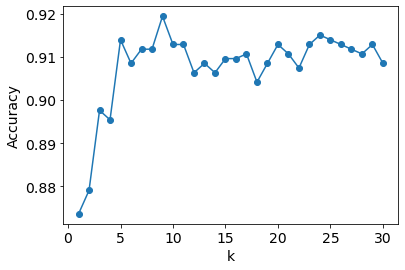

In [26]:
kvalues = np.arange(1,31) # Parameter range

val_acc=[]

for k in kvalues:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_val)
    val_acc.append(accuracy_score(y_val, y_pred))

### Accuracy vs k
plt.plot(kvalues,val_acc,marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
print("The maximum accuracy is obtained at k = " + str(np.argmax(val_acc)+1))

In [27]:
# KNN Model
knn_clf_best = KNeighborsClassifier(n_neighbors=9)
knn_clf_best.fit(X_train, y_train)

# Calculating rmse value
knn_train_rmse = rmse(y_train, knn_clf_best.predict(X_train))
knn_val_rmse = rmse(y_val, knn_clf_best.predict(X_val))

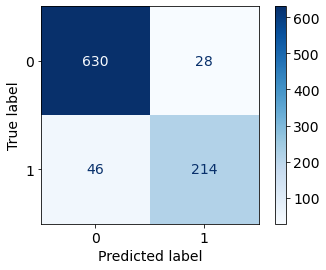

In [28]:
# creating confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_clf_best, X_val, y_val, cmap = plt.cm.Blues);

In [29]:
# calculating error measures for different models
models = [lr_best, log_clf_best, tree_clf_best, knn_clf_best]
y_preds = []
for model in models:
    if model not in [lr_best, log_clf_best]:
        y_pred = model.predict(X_val)
    else:
        y_pred = model.predict(X2_val)
    y_preds.append(y_pred)
accuracies = []
f1_scores = []
recall_values = []
for pred in y_preds:
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    recall_values.append(recall)

In [30]:
# creating dataframe for error measures

pd.DataFrame([accuracies, f1_scores, recall_values], columns=['Linear', 'Logistic', 'Tree', 'Knn'], 
              index = ['Accuracies', 'F1 Scores', 'Recall Values'])

,Linear,Logistic,Tree,Knn
Accuracies,0.919390,0.919390,0.919390,0.919390
F1 Scores,0.852590,0.852590,0.852590,0.852590
Recall Values,0.823077,0.823077,0.823077,0.823077


In [31]:
# creating dataframe for rmse values
pd.DataFrame([[lr_train_rmse, lr_val_rmse], [log_train_rmse, log_val_rmse],[tree_train_rmse, tree_val_rmse], 
              [knn_train_rmse, knn_val_rmse]], columns=['RMSE Train', 'RMSE Validation'], 
              index = ['Linear', 'Logistic', 'Tree', 'kNN'])

,RMSE Train,RMSE Validation
Linear,0.236831,0.233474
Logistic,0.000000,0.000000
Tree,0.000000,0.000000
kNN,0.277739,0.283919


ROC AUC train = 1.000
ROC AUC val = 1.000


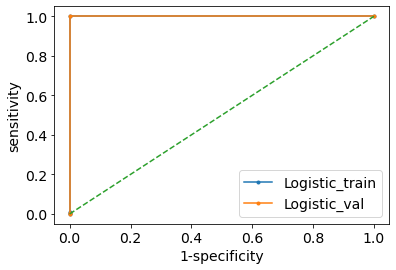

In [32]:
# creating ROC curve for Logistic model

# Predict probabilities for the training set
lr_probs_train = log_clf_best.predict_proba(X2_train)

# Retain probabilities for only positive outcomes
lr_probs_train = lr_probs_train[:, 1]

# Predict probabilities for the validation set and retain them for only positive outcomes
lr_probs_val = log_clf_best.predict_proba(X_val)[:, 1]

# Calculate ROC AUC scores for training and validation predictions
lr_auc_train = roc_auc_score(y_train, lr_probs_train)
lr_auc_val = roc_auc_score(y_val, lr_probs_val)

# Print scores
print('ROC AUC train = %.3f' % (lr_auc_train))
print('ROC AUC val = %.3f' % (lr_auc_val))

# Calculate 1-specificity and sensitivity values for training and validation predictions
lr_1sp_train, lr_sen_train, _ = roc_curve(y_train, lr_probs_train)
lr_1sp_val, lr_sen_val, _ = roc_curve(y_val, lr_probs_val)

# Plot the ROC curve for the model
plt.plot(lr_1sp_train, lr_sen_train, marker = '.', label = 'Logistic_train')
plt.plot(lr_1sp_val, lr_sen_val, marker = '.', label = 'Logistic_val')
plt.plot([0,1], [0,1], linestyle = '--') # Baseline

# Set axis labels
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')

# Show the legend
plt.legend()

# Show the plot
plt.show()

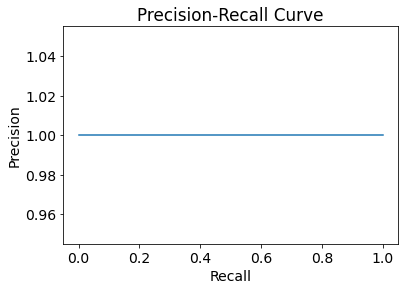

In [33]:
# Calculate precision and recall for the validation predictions
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, lr_probs_val)

# Create the precision-recall curve
plt.plot(recall,precision)

# Add axis labels to the plot
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')

# Show the plot
plt.show()

### Task 3 

You have now built (at least) three machine learning models. Choose the best model according to your metrics and provide the following recommendations
-  Hospital Rating Predictor: Using the best model of your choice, predict the ratings of a few new hospitals which are yet to be assigned a rating by CMS. The information for these hospitals has been provided in a separate CSV file named 'not_yet_rated.csv'.
- Hospital Improvement Plan: Let's say a few of the hospitals were rated low (0) by the model that you chose. Provide recommendations on how these hospitals can improve their ratings

In [34]:
###Let's read the not_yet_rated dataset
new = pd.read_csv('not_yet_rated.csv')
new

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,520189,Government,Yes,2,1,2,2,2,2,1,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,370029,Government,No,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,370032,Others,Yes,1,2,1,0,1,1,1,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,370036,Government,Yes,1,1,1,1,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957
5,370037,Voluntary,Yes,1,2,0,1,1,1,0,...,-0.41000,-0.871177,-1.179000,-0.68600,-17.900000,-7.100000,-4.000000,-2.500000,-37.900000,-15.000000


In [35]:
## Check the top 5 rows
new.drop('Provider ID', axis = 1, inplace = True)
new.head()

,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Voluntary,Yes,1,1,2,2,2,2,1,-12.500000,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,Government,Yes,2,1,2,2,2,2,1,-13.800000,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,Government,No,1,1,1,1,1,2,1,-14.054091,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,Others,Yes,1,2,1,0,1,1,1,-15.700000,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,Government,Yes,1,1,1,1,0,2,1,-14.054091,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957


### Approach to predict ratings
- Perform the exact same data preparation steps as earlier
   - Drop the unnecessary columns
   - Convert the datatypes of categorical variables and create dummies
   - Standardize the numeric columns
- After that we shall use the `.predict()` method of your ML model to predict the ratings

In [36]:
new['Emergency Services'] = new['Emergency Services'].apply(lambda x: 0 if x == 'Yes' else 1)
new['Hospital Ownership'] = new['Hospital Ownership'].apply(lambda x: {'Government': 0, 'Voluntary': 1, 'Others': 2}[x])

In [37]:
# categorizing columns
cats_vars = ['Hospital Ownership', 'Emergency Services',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison']

for column in cats_vars:
    new[column] = pd.Categorical(new[column])

In [38]:
new_log = pd.get_dummies(new, drop_first = True)
new_knn = pd.get_dummies(new, drop_first = False)

In [39]:
# creating 0 columns
missing_column_1 = set(X2.columns) - set(new_log.columns)
missing_column_2 = set(X2.columns) - set(new_knn.columns)

for col in missing_column_1:
    new_log[col] = 0
new_log = new_log.reindex(columns=X2.columns)

for cols in missing_column_2:
    new_knn[cols] = 0
new_knn = new_log.reindex(columns=X.columns)

In [40]:
# standardizing numeric columns
numeric_columns = [col for col in new_log.columns if new_log[col].dtypes != 'category']
new_log[numeric_columns]= scaler.transform(new_log[numeric_columns])

In [41]:
new_log['predicted_ratings'] = log_clf_best.predict(new_log)

### Approach to identify areas of improvement

- Identify the measures which have a positive influence on the overall hospital ratings. For example,
    - if you're using a logistic regression model, you can check the coefficients
        - A +ve coefficient indicates +ve influence on the overall hospital rating
        - A -ve coefficient indicates -ve influence on the overall hospital rating
- Identify in which of the above measures a low-rated hospital is currently lagging behind. These measures need to be improved.
- Further deep dive into the sub-measures using the same approach as above. 

In [42]:
# checking influence of different features on the prediction
feat_coef = pd.DataFrame({'coefficients': log_clf_best.coef_.flatten(), 'features': new_log.columns.drop('predicted_ratings')})
feat_coef.sort_values(by = 'coefficients', ascending = False)

,coefficients,features
6,21.297972,rating_group
61,1.582619,SAFETY_PSI_90_SAFETY_Score
53,1.462265,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score
3,1.405446,MORT_30_HF_Score
4,1.148160,MORT_30_PN_Score
...,...,...
67,-0.282132,SAFETY_HAI_4_SIR_Score
81,-0.287318,Mortality national comparison_0
93,-0.292768,Effectiveness of care national comparison_0
51,-0.624409,EXP_H_STAR_RATING_Score


In [43]:
# checking the predicted ratings of hospitals
pred_ratings = pd.DataFrame({'ratings': new_log['predicted_ratings'], 'rating_group': new_log['rating_group'], 'READM_30_HOSP_WIDE_Score': new_log['READM_30_HOSP_WIDE_Score']})
pred_ratings

,ratings,rating_group,READM_30_HOSP_WIDE_Score
0,1,1.333296,-0.632715
1,1,1.333296,-1.501597
2,0,-0.047779,-0.415495
3,0,-0.047779,-0.198274
4,0,-0.047779,0.887828
5,0,-0.047779,0.236166
